# Clustering Algorithms: k-means and DBSCAN

This chapter will cover **Unsupervised Learning**, where we work with data without labels. It is important to emphasize the importance of this segment because it represents the majority of data in the real world. Some examples that will be covered in the chapter are:

- **Clustering**: Groups similar groups into _Clusters_. Useful for data analysis, customer segmentation, recommendations, etc.
- **Anomaly Detection** (or _Outlier Detection_): Detects instances that are abnormal compared to the patterns of the others (_Anomalies/Outliers_ = Abnormal instances; _Inliners_ = Normal instances). Useful for detecting fraud, defective products, trends, etc.
- **Density Estimation**: Estimates _Probability Density Function_ (PDF). Useful for detecting anomalies in low-density regions.

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Clustering Algorithms: k-means and DBSCAN

**Clustering** consists of identifying similar instances and grouping them into groups, or _Clusters_. Some of its most popular algorithms are **k-means** and **DBSCAN**. It can be used in a range of applications such as:

- **Customer Segmentation**: Useful for Recommender Systems, when identifying patterns of purchases and activities on websites.

- **Data Analysis**: Helps in visualization;

- **Dimensionality Reduction**: After clustering, it is possible to see the Affinity of the instances, which measures how well an instance is in a cluster.

- **Feature Engineering**: As shown in chapter 2, the geographic cluster of the California Housing dataset.

- **Anomaly Detection**: Detects based on the Low Affinity of the instances in the clusters.

- **Semi-Supervised Learning**: If there are some instances, it is possible to cluster and propagate the captions to other instances in the same cluster.

- **Search Engines**: An example is image searches, finding one that is close to the cluster of the image used to perform the search.

- **Image Segmentation**: Clusters pixels according to colors, replacing and reducing the number of different colors, used for object detection and tracking systems, in addition to detecting contours.


### k-means

The **k-means** algorithm is capable of clustering instances in a few iterations. It is necessary to first define the number **k** of clusters present in the instances (often not obvious as in the current dataset, we will discuss this later) and try to find the center (or _centroid_) of these clusters.

Then, each instance will have a designated _cluster index label_ (not to be confused with _class label_ in classification)

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

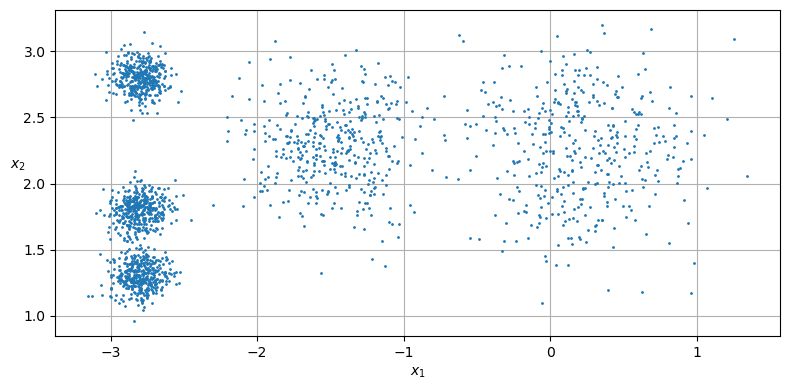

In [9]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_plot")
plt.show()

It is possible to see the labels that were classified using the variable _labels__, or just the prediction:

In [11]:
y_pred

array([0, 0, 4, ..., 3, 1, 0])

In [12]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0])

It is also possible to see the five centroids that the algorithm found:

In [14]:
kmeans.cluster_centers_


array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

And make predictons for new values:

In [16]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3])

#### Decision Boundaries

Plottng the cluster’s decision boundaries, that behave like a **Voronoi tessellation**, where the "X" represents the centroids:

In [33]:
def plot_data(x):
    plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)
    return None

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)
    return None

def plot_decision_boundaries(clusterer, x, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = x.min(axis=0) - 0.1
    maxs = x.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(x)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    return None

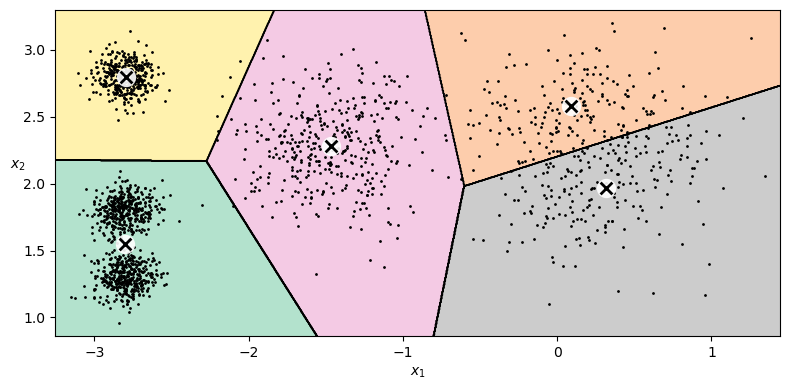

In [35]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

#### Hard Clustering vs Soft Clustering

- **Hard Clustering**: Each instance is assigned to one cluster;
- **Soft Clustering**: It is given the instances a score per cluster. The score can be the distance between the instance and the centroid or a _similarity score_ (or  _Affinity_), like _Gaussian Radial Basis_

In the `KMeans` class, `transform()` method measures the distance from each instance to every centroid:

In [37]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

#### The k-means algorithm

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:

1. Initialize **k** centroids randomly, in **k** random instances.
2. Repeat until convergence (i.e., until the centroids stop moving):
3. Assign each instance to the closest centroid.

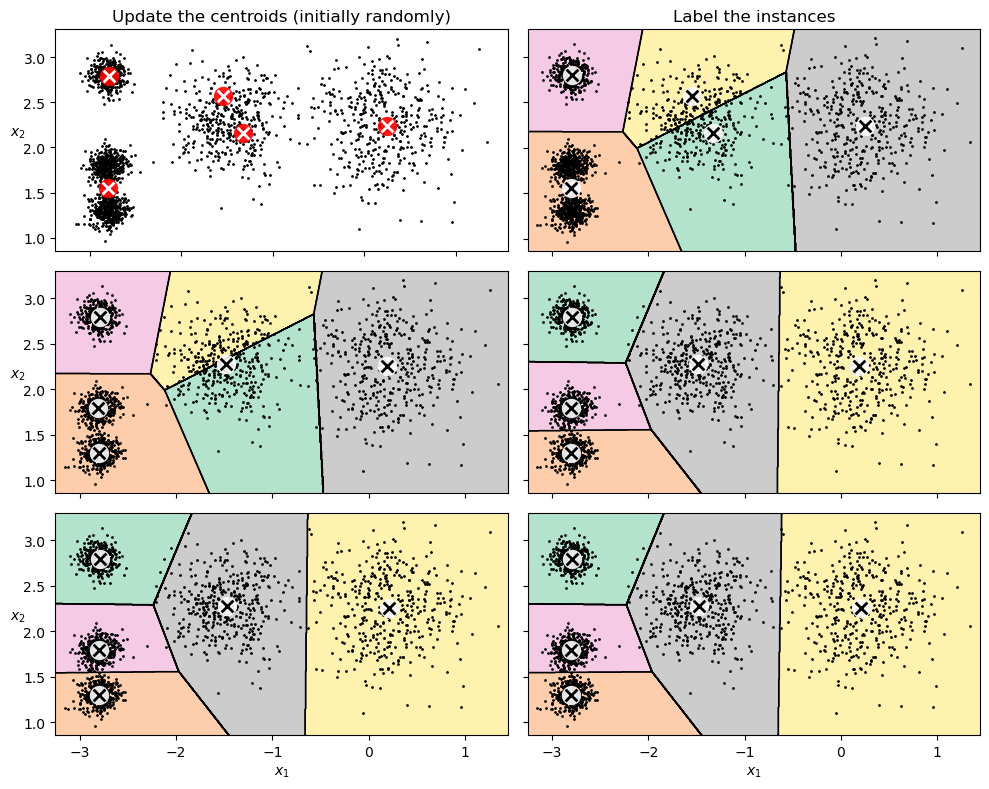

In [45]:
# Need to fix this functions

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=4, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=4, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=4, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

Although it converges, there are times when it can get stuck in a local minimum. For this, we will see ways to avoid this.

#### Centroid initialization methods

There are 3 most popular methods to select the centroid:

1. Starting with parameters that we know will be good from the `init` hyperparameter:

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X

2. Running the algorithm several times and keeping the best solution with the `n_init` hyperparameter

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             random_state=2)
kmeans_rnd_10_inits.fit(X)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

3. Using the _K-means++_ algorithm. `init="k-means++"`

The algorithm operates in the steps of, first, selecting the centroid $c^{(1)}$ in the dataset.
   
After that, select a new centroid $c^{(i)}$ by choosing an instance $x^{(1)}$ through the probability expressed by the equation 
$D(x^{(i)})^{2}/ \sum_{j=1}^{m} D(x^{(j)})^{2}$, where $D(x^{(i)})$is the distance between the instance $x^{(i)}$ and the closest centroid already chosen (in the case in question, it would be $c^{(1)}$)and repeat this step until selecting the k centroids

  Repeat the previous step until all k centroids have been chosen.

<div class="alert alert-block alert-info">
<b>Tip:</b> For all of these options, we need to pay attention to the factor called <b>Inertia</b>. This is given by the sum of the squared distances between the instances and their closest centroids. The lowest the Inertia, the better.
</div>

There's two forms that we can get the inertia. First, using the variable `inertia_`

In [60]:
kmeans.inertia_

219.42800073647604

The other way is using the `score()` from the predictor (the value  is negative because `score()` have to respect the rule that "higher is better").

In [62]:
kmeans.score(X)

-219.42800073647604

#### Accelerated k-means and mini-batch k-means

The **Elkan Algorithm** or **Accelerated Algorithm** is used in data sets with many clusters, avoiding unnecessary distance calculations. It does this through the triangle inequality and controlling lower and upper bounds for the distances between instances and centroids. It is used through the hyperparameter `algorithm = "elkan"`.

The use of **mini-batches** proposed by Schulley uses mini-batches by moving centroids only a little at each iteration, speeding up the algorithm and making it possible to cluster large data sets. It is possible to use it with the `MiniBatchKMeans` class. This method is faster than the others, but usualy have a worse inertia.

In [67]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [69]:
minibatch_kmeans.inertia_

211.6589937457431

1/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

2/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

3/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

4/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

5/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

6/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

7/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

8/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

9/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

10/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

11/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

12/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

13/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

14/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

15/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

16/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

17/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

18/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

19/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

20/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

21/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

22/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

23/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

24/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

25/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

26/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

27/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

28/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

29/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

30/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

31/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

32/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

33/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

34/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

35/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

36/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

37/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

38/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

39/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

40/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

41/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

42/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

43/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

44/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

45/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

46/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

47/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

48/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

49/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

50/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

51/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

52/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

53/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

54/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

55/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

56/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

57/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

58/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

59/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

60/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

61/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

62/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

63/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

64/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

65/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

66/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

67/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

68/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

69/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

70/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

71/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

72/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

73/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

74/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

75/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

76/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

77/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

78/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

79/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

80/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

81/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

82/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

83/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

84/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

85/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

86/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

87/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

88/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

89/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

90/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

91/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

92/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

93/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

94/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

95/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

96/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

97/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

98/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

99/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

100/100

C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\erhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1941: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

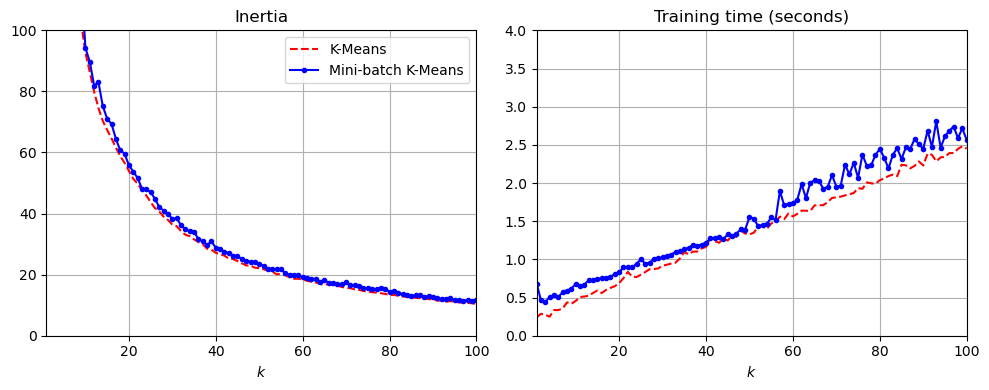

In [71]:
from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

save_fig("minibatch_kmeans_vs_kmeans_plot")
plt.show()

#### Finding the optimal number of clusters

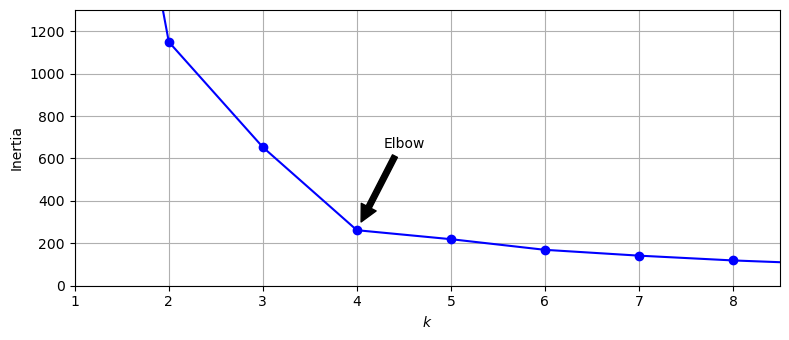

In [73]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
save_fig("inertia_vs_k_plot")
plt.show()

In [77]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6353422668284152

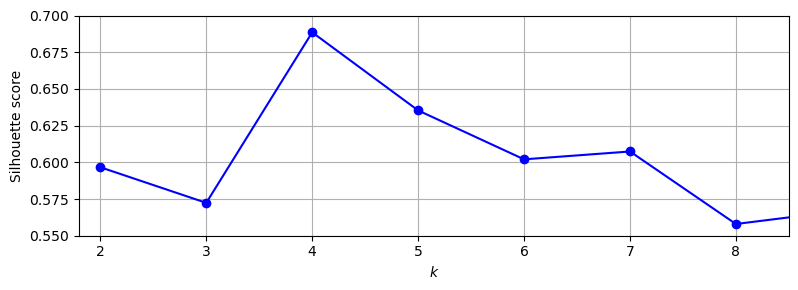

In [79]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
save_fig("silhouette_score_vs_k_plot")
plt.show()

### Limits of k-means

Although it has several advantages, the k-means algorithm performs poorly when faced with clusters of _different sizes_, _densities_ or _shapes_ that are **not spherical**. An example would be the Gaussian Mixture algorithm, which performs better on elliptical shapes.

### Using Clustering for Image Segmentation

### Using Clustering for Semi-Supervised Learning

### DBSCAN

### Other Clustering Algorithms

## Gaussian Mixtures

### Using Gaussian Mixtures for Anomaly Detection

### Selecting the Number of Clusters

### Bayesian Gaussian Mixture Models

### Other Algorithms for Anomaly and Novelty Detection

- **Fast-MCD (Minimum Covariance Determinant)**: Model assumes that normal instances (inliners) were generated by a **Single Gaussian Distribution** and that outliers were not generated by it. Useful for identifying outliers and cleaning data sets. Implemented by the `EllipticEnvelope` class;

- **Isolation Forest**: Consists of multiple _Random Forests_ until all instances are isolated. The values ​​with the greatest isolation are considered anomalous. Useful for detecting outliers in high-dimensional sets;

- **Local Outlier Factor (LOF)**: Compares the density of instances around an instance and its neighbors, considering the most isolated anomaly as the anomaly. Useful for detecting outliers;

- **One-Class (SVM)**: As in a kernelized SVM classifier, they separate into two classes after implicitly mapping high-dimensional spaces. Since there is only one class, the inliner instances are considered one class and the anomalies are considered the other. Useful for detecting novelties and performs well in high dimensions, but not in large datasets.

- **PCA/ Dimensional Reduction Techniques with `inverse_transform()`**: When performing the inverse (or reconstruction), it is noticed that the error of a normal instance when reconstructed in comparison to an anomaly is much smaller. Used in anomaly detection.